In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

import seaborn as sns

HairCutBatch = pd.read_csv('First_batch_hair.csv')

In [109]:
#Change all days to uppercase

# I was trying to find a more dynamic way of doing this conversion to i.e. 13 = 1
# HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '1' + str(s) if len(str(s)) == 1 else s) 

HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '13' if s == 1 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '14' if s == 2 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '15' if s == 3 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '16' if s == 4 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '17' if s == 5 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '18' if s == 6 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '19' if s == 7 else s)
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '20' if s == 8 else s) 

HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Tue' if s == "Tues" else s) 
HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Thu' if s == "Thurs" else s) 
HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Thu' if s == "Thur" else s) 


HairCutBatch['Day'] = HairCutBatch['Day'].str.upper()
#Cannot find a way to convert partial date name string to full date object
# HairCutBatch['Day'] = pd.to_datetime(HairCutBatch['Day'])
HairCutBatch['Time'] = pd.to_datetime(HairCutBatch['Time'], format='%H').dt.strftime('%H:%M')

HairCutBatch.head(100)

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17:00,FRI,I,NM,30
1,1.0,14:00,TUE,E,NM,10
2,1.0,19:00,TUE,I,NM,35
3,2.0,17:00,MON,I,NM,35
4,2.0,12:00,FRI,M,NM,15
...,...,...,...,...,...,...
95,10.0,12:00,THU,M,NM,30
96,10.0,15:00,FRI,W,NM,30
97,10.0,13:00,SAT,W,M,35
98,10.0,15:00,SAT,A,NM,30


In [110]:
HairCutBatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tip amount  232 non-null    float64
 1   Time        232 non-null    object 
 2   Day         232 non-null    object 
 3   Culture     232 non-null    object 
 4   Married     232 non-null    object 
 5   Age         232 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.0+ KB


In [111]:
HairCutBatch.describe().T

,count,mean,std,min,25%,50%,75%,max
Tip amount,232.0,6.612069,5.195772,0.0,4.0,5.0,7.0,40.0
Age,232.0,31.607759,11.354063,3.0,30.0,30.0,40.0,70.0


In [112]:
HairCutBatch.head()

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17:00,FRI,I,NM,30
1,1.0,14:00,TUE,E,NM,10
2,1.0,19:00,TUE,I,NM,35
3,2.0,17:00,MON,I,NM,35
4,2.0,12:00,FRI,M,NM,15


In [113]:
HairCutBatch = HairCutBatch[HairCutBatch['Tip amount'].notnull()]

In [114]:
HairCutBatch.groupby('Married')['Tip amount'].mean()

Married
Kid    3.500000
M      6.224359
NM     6.830065
Name: Tip amount, dtype: float64

## This one is plotting the tip amount agains age of customers and culture

c:\py-env\aai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


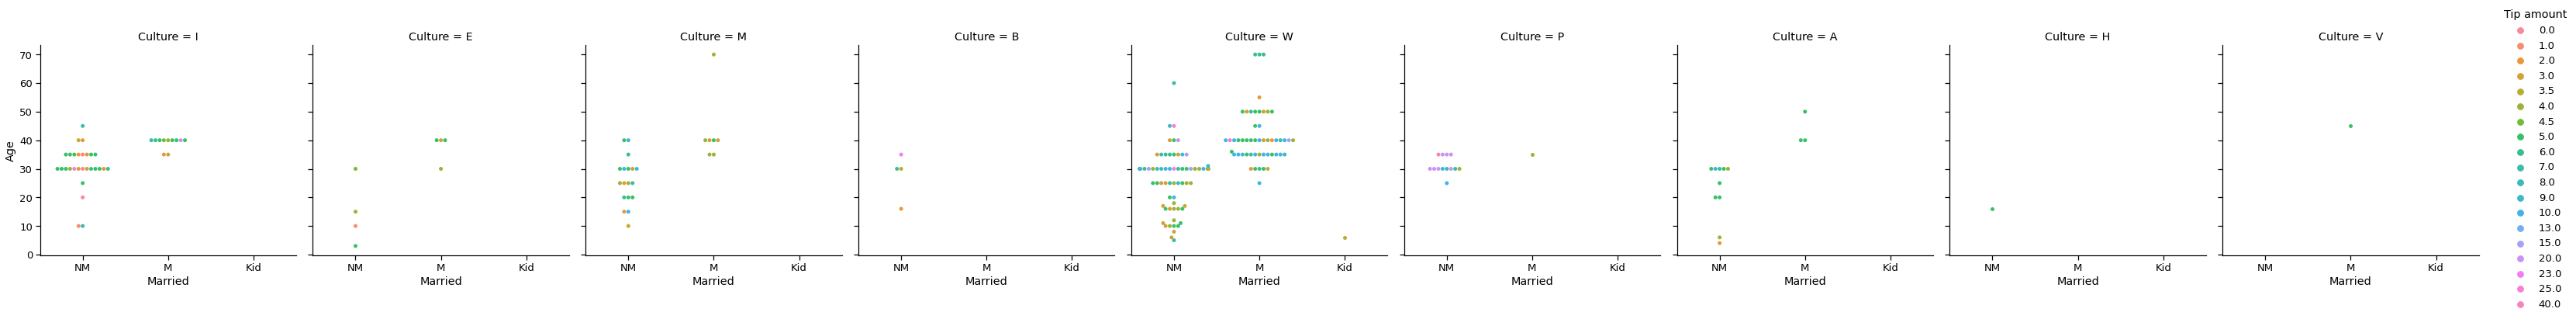

In [115]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Age',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

## This one is plotting the tip amount against culture

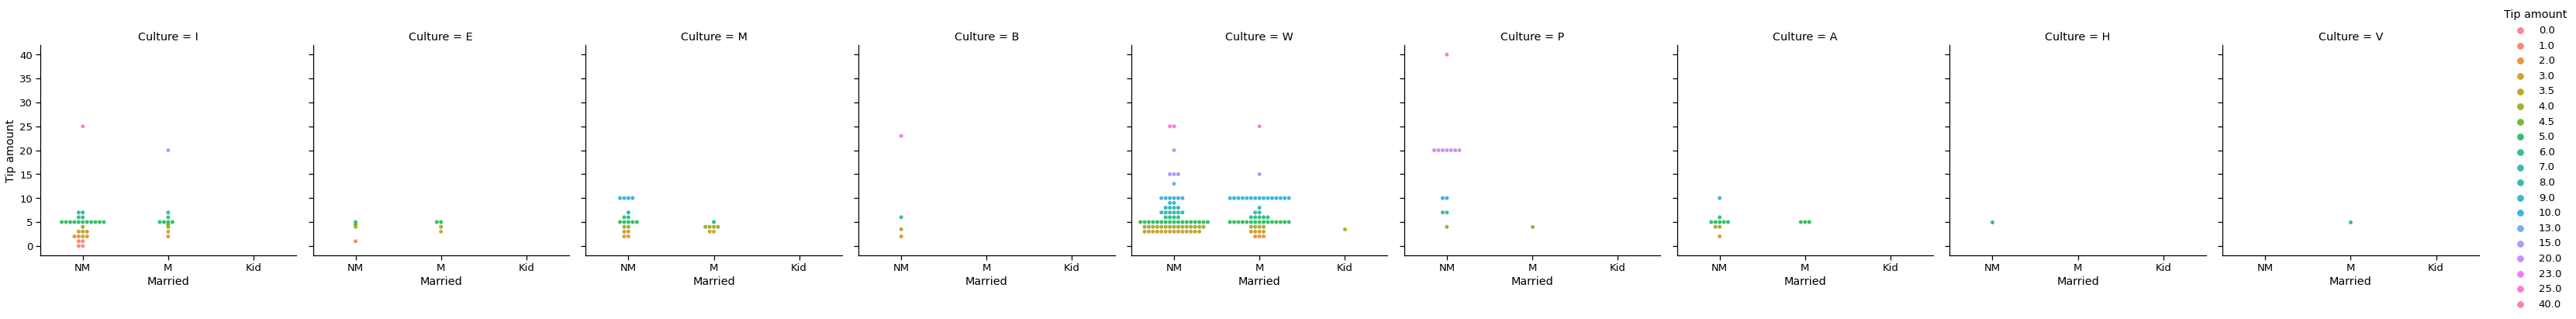

In [116]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Tip amount',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

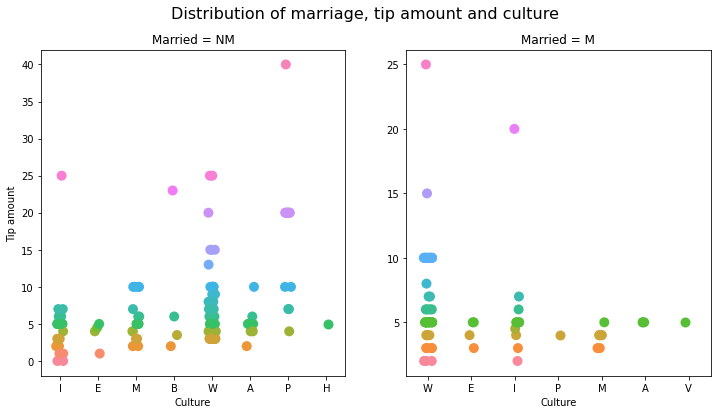

In [117]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Tip amount',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

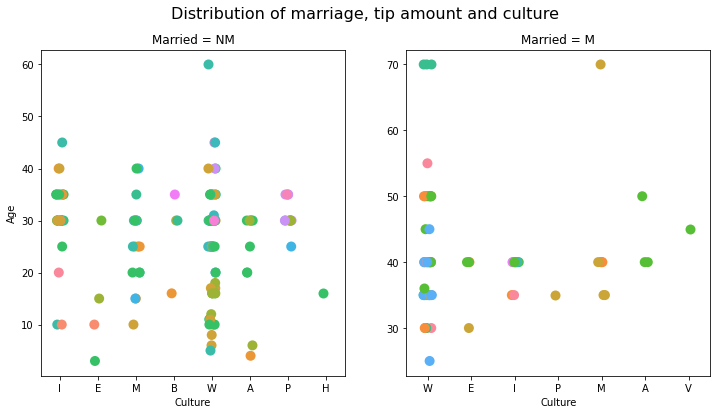

In [118]:

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Age',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

## Finding the highest tipping time of week

In [119]:
#Create pivot table before making heatmap
HeatplotDay = pd.pivot_table(HairCutBatch, values="Tip amount", index=['Day'], columns=['Time'])

#Reorder days on 0 axis
column_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
HeatplotDay = HeatplotDay.reindex(column_order, axis=0)

#View pivot table
HeatplotDay.head(100)

Time,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00
Day,,,,,,,,,,,
MON,12.500000,4.750000,4.000000,10.500000,4.000000,4.555556,5.600000,5.333333,10.0,NaN,NaN
TUE,4.000000,10.333333,5.500000,5.000000,5.833333,8.857143,11.200000,5.750000,14.5,3.666667,NaN
WED,16.250000,6.000000,6.000000,8.200000,4.333333,10.000000,3.500000,13.000000,NaN,NaN,NaN
THU,6.000000,5.000000,7.000000,4.666667,4.000000,6.500000,9.666667,6.500000,5.0,3.500000,NaN
FRI,7.000000,6.875000,4.875000,5.357143,6.666667,6.750000,5.000000,0.000000,6.0,8.750000,5.0
SAT,5.666667,5.857143,5.285714,4.772727,7.571429,4.714286,8.400000,5.800000,7.0,NaN,NaN
SUN,6.000000,3.250000,3.000000,6.750000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time', ylabel='Day'>

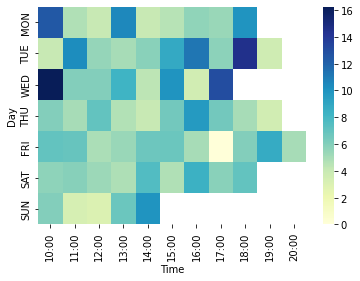

In [120]:
sns.heatmap(HeatplotDay, cmap="YlGnBu")

<AxesSubplot:xlabel='Time', ylabel='Day'>

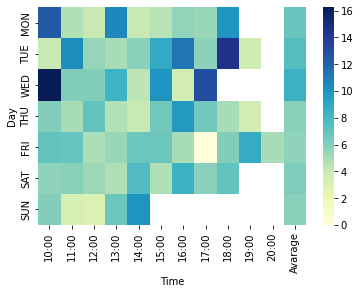

In [121]:
HeatplotDay['Avarage'] = HeatplotDay.mean(axis=1).astype(float)
# HeatplotDay.head(100)
sns.heatmap(HeatplotDay, cmap="YlGnBu")

### The below analysis shows the amount of times a tip has been given in the entire dataset grouped by dates and hours

In [143]:
TotalCount = pd.pivot_table(HairCutBatch, values='Tip amount', index=['Day'], columns=['Time'], aggfunc=lambda x: sum(x.value_counts())).reset_index()
TotalCount['Total tip instances of day in set'] = TotalCount.sum(axis=1).astype(float)

TotalCount.head(100)


C:\Users\Ingimar\AppData\Local\Temp/ipykernel_51276/699952328.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TotalCount['Total tip instances of day in set'] = TotalCount.sum(axis=1).astype(float)


Time,Day,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,Total tip instances of day in set
0,FRI,2.0,8.0,8.0,7.0,6.0,4.0,2.0,1.0,1.0,2.0,1.0,42.0
1,MON,2.0,4.0,3.0,4.0,2.0,9.0,5.0,3.0,3.0,NaN,NaN,35.0
2,SAT,3.0,7.0,7.0,11.0,7.0,7.0,5.0,5.0,1.0,NaN,NaN,53.0
3,SUN,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,THU,2.0,2.0,4.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,NaN,23.0
5,TUE,1.0,3.0,2.0,4.0,6.0,7.0,5.0,4.0,4.0,3.0,NaN,39.0
6,WED,4.0,7.0,5.0,5.0,3.0,3.0,2.0,2.0,NaN,NaN,NaN,31.0


In [ ]:
sns.lineplot(data=TotalCount, x="Day", y="Amount")

### The below analysis shows the sum of all tips given in the entire dataset grouped by dates and hours

In [142]:
#Create pivot table before making regression
#Here I want to find regression of the number of times a tip is given between the day and time
TotalSum = pd.pivot_table(HairCutBatch, values='Tip amount', aggfunc=np.sum, index=['Day'], columns=['Time']).reset_index()
TotalSum['Amount'] = TotalSum.sum(axis=1).astype(float)
TotalSum.head(100)


C:\Users\Ingimar\AppData\Local\Temp/ipykernel_51276/2593270992.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TotalSum['Amount'] = TotalSum.sum(axis=1).astype(float)


Time,Day,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,Amount
0,FRI,14.0,55.0,39.0,37.5,40.0,27.0,10.0,0.0,6.0,17.5,5.0,251.0
1,MON,25.0,19.0,12.0,42.0,8.0,41.0,28.0,16.0,30.0,NaN,NaN,221.0
2,SAT,17.0,41.0,37.0,52.5,53.0,33.0,42.0,29.0,7.0,NaN,NaN,311.5
3,SUN,6.0,13.0,3.0,13.5,10.0,NaN,NaN,NaN,NaN,NaN,NaN,45.5
4,THU,12.0,10.0,28.0,14.0,4.0,13.0,29.0,13.0,10.0,7.0,NaN,140.0
5,TUE,4.0,31.0,11.0,20.0,35.0,62.0,56.0,23.0,58.0,11.0,NaN,311.0
6,WED,65.0,42.0,30.0,41.0,13.0,30.0,7.0,26.0,NaN,NaN,NaN,254.0


## Linear plot of Total sum data above

<AxesSubplot:xlabel='Day', ylabel='Amount'>

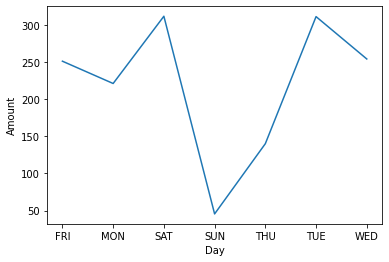

In [147]:
sns.lineplot(data=TotalSum, x="Day", y="Amount")

### The below analysis shows the mean of all tips given in the entire dataset grouped by dates and hours

In [146]:
#Create pivot table before making regression
#Here I want to find regression of the number of times a tip is given between the day and time
TotalMean = pd.pivot_table(HairCutBatch, values='Tip amount', aggfunc=np.mean, index=['Day'], columns=['Time']).reset_index()
TotalMean['Amount'] = TotalMean.mean(axis=1).astype(float)
TotalMean.head(100)

C:\Users\Ingimar\AppData\Local\Temp/ipykernel_51276/3365836393.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TotalMean['Amount'] = TotalMean.mean(axis=1).astype(float)


Time,Day,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,Amount
0,FRI,7.000000,6.875000,4.875000,5.357143,6.666667,6.750000,5.000000,0.000000,6.0,8.750000,5.0,5.661255
1,MON,12.500000,4.750000,4.000000,10.500000,4.000000,4.555556,5.600000,5.333333,10.0,NaN,NaN,6.804321
2,SAT,5.666667,5.857143,5.285714,4.772727,7.571429,4.714286,8.400000,5.800000,7.0,NaN,NaN,6.118663
3,SUN,6.000000,3.250000,3.000000,6.750000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.800000
4,THU,6.000000,5.000000,7.000000,4.666667,4.000000,6.500000,9.666667,6.500000,5.0,3.500000,NaN,5.783333
5,TUE,4.000000,10.333333,5.500000,5.000000,5.833333,8.857143,11.200000,5.750000,14.5,3.666667,NaN,7.464048
6,WED,16.250000,6.000000,6.000000,8.200000,4.333333,10.000000,3.500000,13.000000,NaN,NaN,NaN,8.410417


## Linear plot of mean data above

<AxesSubplot:xlabel='Day', ylabel='Amount'>

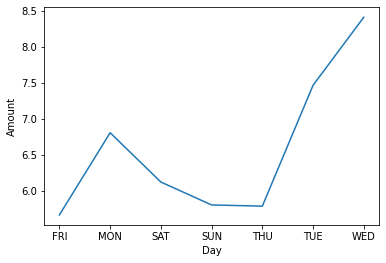

In [148]:
sns.lineplot(data=TotalMean, x="Day", y="Amount")

#### As seen here, this linear regression is not telling us anything usefull, in order for it to work we would need two Interval data type points which effect each other for it to make sense.

In [99]:
# sns.regplot(x='Date number', y="Amount", data=Regression);